# Logistic Regression: Predicting Diagnosis with Cross Validation

## Preparation Work

In [1]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
# Load the data
df = pd.read_csv("Cancer.csv")

# Clean the data
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df = df.dropna()

# View the data
df.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


## 1. Data Exploration and Visualization
### Distribution of Diagnosis

In [3]:
# Extract the column
diagnosis = df['diagnosis']

# Count the frequency
m_count = diagnosis[diagnosis == 'M'].count()
b_count = diagnosis[diagnosis == 'B'].count()
print('The frequency of maglignant diagnosis is', m_count, 'and the frequency of benigh diagnosis is', b_count,'.')

The frequency of maglignant diagnosis is 212 and the frequency of benigh diagnosis is 357 .


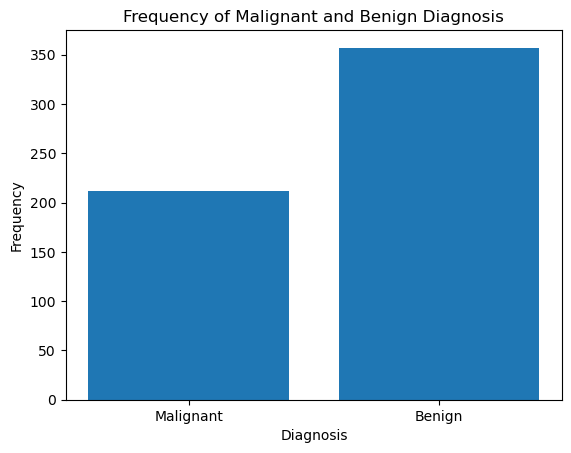

In [4]:
# Draw the bar plot
labels = ['Malignant', 'Benign']
counts = [m_count, b_count]

plt.bar(labels, counts)
plt.xlabel('Diagnosis')
plt.ylabel('Frequency')
plt.title('Frequency of Malignant and Benign Diagnosis')
plt.show()

### Mean Radius for Different Diagnosis

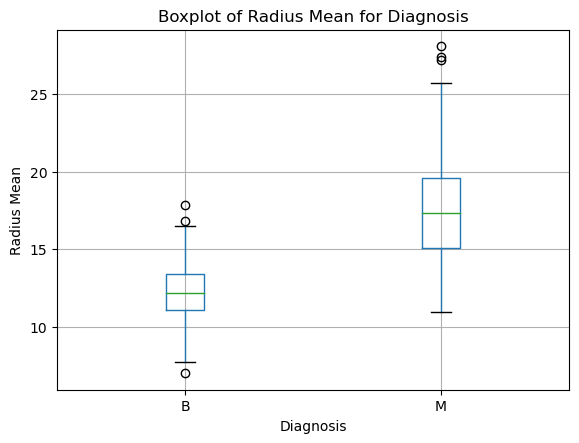

In [5]:
# Draw the boxplot
df.boxplot(column='radius_mean', by='diagnosis', vert=True)
plt.title("Boxplot of Radius Mean for Diagnosis")
plt.xlabel("Diagnosis")
plt.ylabel("Radius Mean")
plt.suptitle('')
plt.show()

According to the boxplot, the radius of malignant diagnosis is larger than the radius of benign diagnosis. And the distribution of radius of malignant diagnosis is more diffuse.

### Distribution of Mean Area

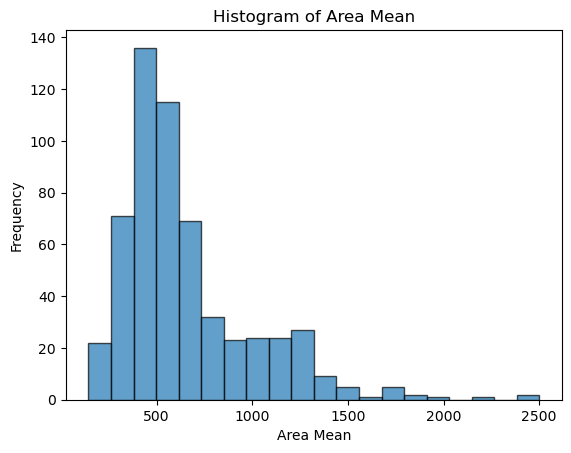

In [6]:
# Draw the histogram of area_mean
plt.hist(df['area_mean'], bins=20, edgecolor='black', alpha=0.7)
plt.title("Histogram of Area Mean")
plt.xlabel("Area Mean")
plt.ylabel("Frequency")
plt.show()

The distribution of mean area is skewed to the right. We can see from this histogram that most of the areas are within 1500, concentrated around 500.

### Texture vs Smoothness

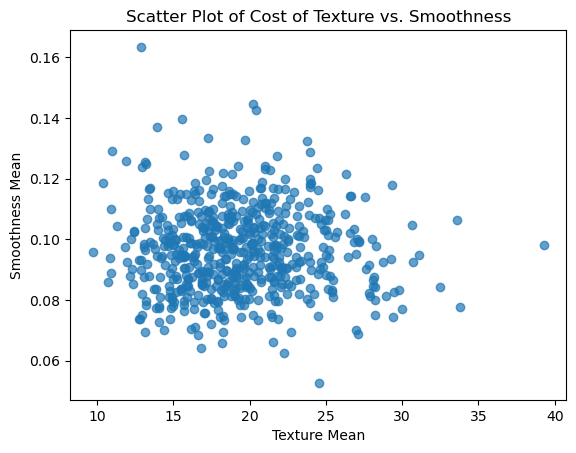

In [7]:
# Scatter plot of texture vs smoothness
plt.scatter(df['texture_mean'], df['smoothness_mean'], alpha=0.7)
plt.title("Scatter Plot of Cost of Texture vs. Smoothness")
plt.xlabel("Texture Mean")
plt.ylabel("Smoothness Mean")
plt.show()

There is no significant correlation between these two variables according to this scatter plot.

### Concavity vs Concave Point

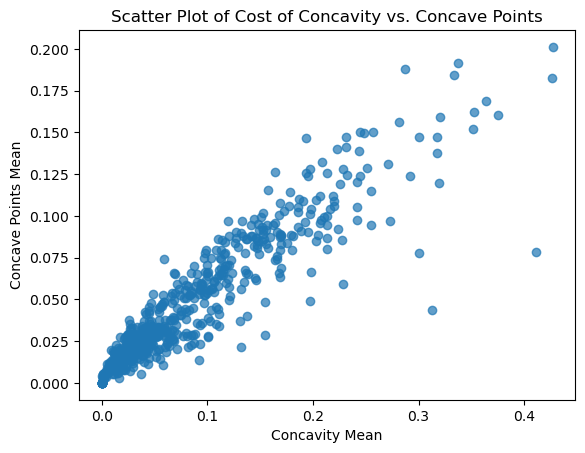

In [8]:
plt.scatter(df['concavity_mean'], df['concave points_mean'], alpha=0.7)
plt.title("Scatter Plot of Cost of Concavity vs. Concave Points")
plt.xlabel("Concavity Mean")
plt.ylabel("Concave Points Mean")
plt.show()

The positive relationship between these two variables is very clear. The higher concavity mean, the higher concave points mean.

### Distribution of Symmetry for Different Diagnosis

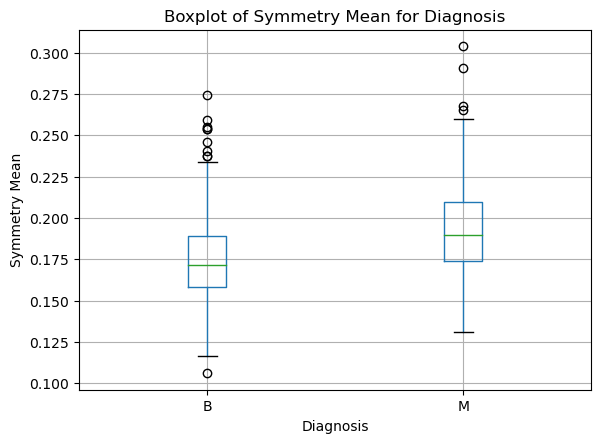

In [9]:
# Draw the Boxplot
df.boxplot(column='symmetry_mean', by='diagnosis', vert=True)
plt.title("Boxplot of Symmetry Mean for Diagnosis")
plt.xlabel("Diagnosis")
plt.ylabel("Symmetry Mean")
plt.suptitle('')
plt.show()

According to the boxplot, the symmetry mean for malignant diagnosis is slightly higher than the symmetry mean for benign diagnosis.

## 2. Logistic Regression Model Development

In [10]:
# Encoding categorical variables
df['diagnosis'] = df['diagnosis'].replace({'M': 1, 'B': 0})

# Display the new data
df.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,1,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,1,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,84458202,1,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,844981,1,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,84501001,1,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


Before this step, I have already dropped the missing values and the unnamed columns. In this step, I replace the categorical variable diagnosis with 0 or 1 value. I replaced 'M' with 1 and replaced 'B' with 0.

In [11]:
# Define dependent and independent variables
X = df.iloc[:, 2:12]
X = sm.add_constant(X)
y = df['diagnosis']

For the independent variables, I choose the first ten columns showing the mean value of radius, texture, perimeter, area and so on. The reason that I choose these ten columns instead of all columns is that they are representative in each feature aspect. The 20 columns I didn't choose show some supplementary information.

In [12]:
# Import package to split the data to training and test sets
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

Before fitting the model, I divide the data into train and test sets and fit the model with the train set.

In [13]:
# Build the logistic regression model
model_GLM = sm.GLM(y_train, X_train, family=sm.families.Binomial()).fit()
model_GLM.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              diagnosis   No. Observations:                  455
Model:                            GLM   Df Residuals:                      444
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -60.673
Date:                Thu, 25 Jan 2024   Deviance:                       121.35
Time:                        18:26:34   Pearson chi2:                     182.
No. Iterations:                     9   Pseudo R-squ. (CS):             0.6510
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    -11.6498     14.299     -0.815      0.415     -39.675      16.376
radius_mean               -1.7021      3.986     -0.427      0.669      -9.515       6.111
texture_mean               0.3852      0.069      5.569      0.000       0.250       0.521
perimeter_mean            -0.0634      0.549     -0.116      0.908      -1.139       1.012
area_mean                  0.0344      0.018      1.861      0.063      -0.002       0.071
smoothness_mean           71.1818     34.991      2.034      0.042       2.600     139.763
compactness_mean         -15.6876     22.099     -0.710      0.478     -59.002      27.627
concavity_mean             5.2800      9.082      0.581      0.561     -12.521      23.081
concave points_mean       89.0492     32.437      2.745      0.006      25.474     152.625
symmetry_mean             18.5525     11.549      1.606      0.108      -4.083      41.187
fractal_dimension_mean   -22.2424     95.651     -0.233      0.816    -209.716     165.231
==========================================================================================
"""

## 3. Model Evaluation
### Predict outcome with test data and GLM model

In [14]:
# Predit the test data using the model
y_pred_prob = model_GLM.predict(X_test)

# Choose the threshold = 0.5
threshold = 0.5
y_pred = (y_pred_prob > threshold).astype(int)

# Show the result of y_pred
y_pred.head(10)

204    0
70     1
131    1
431    0
540    0
567    1
369    1
29     1
81     0
477    0
dtype: int64

### R-squared and RMSE

In [16]:
# Import evaluation packages
from sklearn.metrics import mean_squared_error, r2_score

# R-squared: in sample
r_squared_IS = 1 - (model_GLM.deviance / model_GLM.null_deviance)

# R-squared: Out of sample
r_squared_OOS = r2_score(y_test, y_pred)

# RMSE
RMSE_1 = mean_squared_error(y_test, y_pred, squared=False)

# Summary the result
print("In Sample R^2:", r_squared_IS, "; Out of Sample R^2:", r_squared_OOS, "; RMSE:", RMSE_1)

In Sample R^2: 0.7978700029063303 ; Out of Sample R^2: 0.7759580740255486 ; RMSE: 0.22941573387056177


The R-squared of this model is around 0.78-0.80, showing that it has a relatively strong explanatory power for the variability of the target variable. The RMSE is 0.23 which is relatively low. However, these two metrics are often used to evaluate the performance of linear regression models, so they are not very approperiate here and we need some other metrics to evaluate the logistic regression model.

### Accuracy Score and Other Metrics for Logistic Regression

In [17]:
# Import evaluation packages
from sklearn.metrics import classification_report

# Classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        71
           1       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



From the classification report, we can see the accuracy of this model is about 0.95, showing that the model correctly predicted whether the cancer was malignant or benign for about 94.15% of the cases in the test set. It's a accuracy score showing the good fitness of the model. What's more, the classification report shows the precision score, recall, f1-score for the diagnosis result, indicating the model is quite precise and has a good balance.

## 4. Testing Interactions Between Features
### Linear Regression Model without Interactions

In [18]:
# Use the same train set to build OLS instead of GLM model
model_OLS = sm.OLS(y_train, X_train).fit()
model_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              diagnosis   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     97.05
Date:                Thu, 25 Jan 2024   Prob (F-statistic):          4.58e-105
Time:                        18:27:00   Log-Likelihood:                -51.072
No. Observations:                 455   AIC:                             124.1
Df Residuals:                     444   BIC:                             169.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -1.9689      0.458     -4.303      0.000      -2.868      -1.070
radius_mean                0.4588      0.147      3.120      0.002       0.170       0.748
texture_mean               0.0227      0.003      6.999      0.000       0.016       0.029
perimeter_mean            -0.0506      0.024     -2.132      0.034      -0.097      -0.004
area_mean                 -0.0010      0.000     -3.749      0.000      -0.002      -0.000
smoothness_mean            1.4904      1.572      0.948      0.344      -1.599       4.579
compactness_mean          -0.2071      1.171     -0.177      0.860      -2.508       2.094
concavity_mean             0.5092      0.534      0.953      0.341      -0.541       1.559
concave points_mean        8.0684      1.573      5.128      0.000       4.976      11.160
symmetry_mean              0.8869      0.629      1.410      0.159      -0.349       2.123
fractal_dimension_mean     0.3497      4.657      0.075      0.940      -8.803       9.502
==============================================================================
Omnibus:                        9.382   Durbin-Watson:                   2.116
Prob(Omnibus):                  0.009   Jarque-Bera (JB):                9.671
Skew:                           0.356   Prob(JB):                      0.00794
Kurtosis:                       2.946   Cond. No.                     2.77e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.77e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Here is the linear regression model using the same variables with the logistic regression model. However, it doesn't fit the case and the R-suqared is smaller than the logistic regression model. To summary, here are the issues that occur when using a linear regression model to predict binary outcomes:

**Violates Binary Nature of the Outcome**: Linear regression assumes a continuous outcome, making it unsuitable for binary outcomes (0 or 1). The model may produce predicted values outside the valid range for binary classification such as negative value. It will also make the coefficients hard to interprate.

**Sensitive to Outliers**: Linear regression is sensitive to outliers, and binary outcomes often lead to skewed distributions. Outliers or extreme values in the binary response variable can disproportionately influence the linear regression model.

**Assumption of Homoscedasticity**: Linear regression assumes homoscedasticity, meaning that the variance of the residuals is constant across all levels of the predictor variable. In binary classification, where the outcome is binary, the assumption of constant variance may not hold.

### Linear Regression Model with Interactions

In [19]:
# Build the interactions of diagnosis with radius and texture
df['diagnosis_radius_interaction'] = df['diagnosis'] * df['radius_mean']
df['diagnosis_texture_interaction'] = df['diagnosis'] * df['texture_mean']

# Define the dependent and independent variables
X = df[['radius_mean', 'texture_mean', 'diagnosis_radius_interaction','diagnosis_texture_interaction']]
X = sm.add_constant(X)
y = df['diagnosis']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the data into linear regression model
model_interaction = sm.OLS(y_train, X_train).fit()
model_interaction.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              diagnosis   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     6832.
Date:                Thu, 25 Jan 2024   Prob (F-statistic):               0.00
Time:                        18:27:01   Log-Likelihood:                 623.26
No. Observations:                 455   AIC:                            -1237.
Df Residuals:                     450   BIC:                            -1216.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                             0.4193      0.023     18.025      0.000       0.374       0.465
radius_mean                      -0.0230      0.002    -13.455      0.000      -0.026      -0.020
texture_mean                     -0.0075      0.001     -8.573      0.000      -0.009      -0.006
diagnosis_radius_interaction      0.0385      0.002     22.571      0.000       0.035       0.042
diagnosis_texture_interaction     0.0214      0.001     18.157      0.000       0.019       0.024
==============================================================================
Omnibus:                        5.818   Durbin-Watson:                   2.061
Prob(Omnibus):                  0.055   Jarque-Bera (JB):                7.080
Skew:                          -0.127   Prob(JB):                       0.0290
Kurtosis:                       3.556   Cond. No.                         222.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Influence and Interpretation of Interactions

**Influence of Interactions**: After bringing in the interactions, the R-squared of the model increased to 0.984, indicating that the interactions help explain the variation of target variable.

**Interpretation of Interactions**: The interaction of diagnosis(0 or 1) and radius mean shows their mutual effect on the dependent variable(diagnosis), which is the influence of radius mean on diagnosis is different between malignant and benign diagnosis. For example, according to its coefficient(0.0385), one unit increase in radius_mean increases the predicted value by 0.0155 (-0.0230+0.0385=0.0155) units for malignant cases, holding other variables constant. And one unit increase in radius_mean decrease the predicted value by 0.0230 when its benign. The interpretation for the other interaction item is similar.

**Implications for understanding the data**: Interaction items are important in the model when they have collective effect on the predicted value. We should take them into consideration when building the model. However, in this case, the interaction is between dependent and independent variables, making the model a little weird. What's more, linear regression model is not approperiate for predicting binary outcome. Thus, this model and coefficients are not very meaningful.

## 5. Feature Selection and Cross-Validation
### Create a reduced logistic regression model with FDR

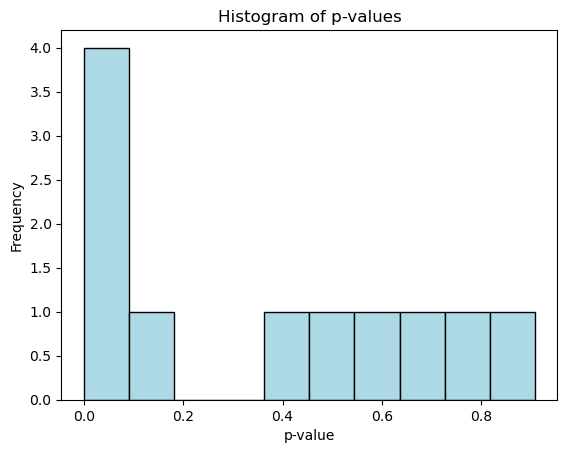

In [20]:
# Extract p-values for model in Q2 - full model
p_values = model_GLM.pvalues

# Draw the histogram
plt.hist(p_values, color="lightblue", edgecolor="black")
plt.xlabel("p-value")
plt.ylabel("Frequency")
plt.title("Histogram of p-values")
plt.show()

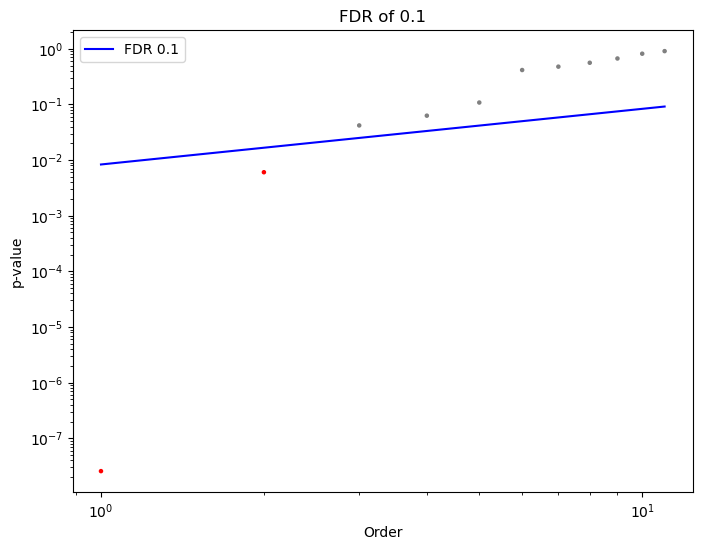

Threshold p-value at 10% FDR: 0.0060


In [21]:
# Define the fdr function
def fdr_cut(pvals, q=0.1):
    
    # Sort p-values and remove NaNs
    pvals = sorted([p for p in pvals if not pd.isna(p)])
    N = len(pvals)
    k = np.arange(1, N + 1)
    alpha = max(p for p, rank in zip(pvals, k) if p <= q * rank / (N + 1))

    # Plot the p-values
    plt.figure(figsize=(8, 6))
    plt.scatter(k, pvals, c=['gray' if p > alpha else 'red' for p in pvals], s=5)
    plt.plot(k, q * k / (N + 1), color='blue', label=f'FDR {q}')
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel("Order")
    plt.ylabel("p-value")
    plt.title(f"FDR of {q}")
    plt.legend()
    plt.show()

    return alpha

# Apply the function on the extracted p-values
threshold = fdr_cut(p_values)
print(f"Threshold p-value at 10% FDR: {threshold:.4f}")


In [21]:
# Identify the significant predictors
significant_predictors = p_values[p_values <= 0.006].index.tolist()
significant_predictors

['texture_mean']

According to the result of FDR control, only one independent variable, texture_mean, is significant predictor. Thus, it will be the only independent variable in the reduced model.

### Build the Reduced Model

In [24]:
# Build the reduced logistic regression model
X_cut = df['texture_mean']
X_cut = sm.add_constant(X_cut)
y = df['diagnosis']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_cut, y, test_size=0.2, random_state=42)

# Fit and summary the model
model_GLM_reduced = sm.GLM(y_train, X_train, family=sm.families.Binomial()).fit()
model_GLM_reduced.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              diagnosis   No. Observations:                  455
Model:                            GLM   Df Residuals:                      453
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -257.84
Date:                Thu, 25 Jan 2024   Deviance:                       515.67
Time:                        18:29:15   Pearson chi2:                     469.
No. Iterations:                     4   Pseudo R-squ. (CS):             0.1698
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -5.2087      0.600     -8.684      0.000      -6.384      -4.033
texture_mean     0.2402      0.030      7.993      0.000       0.181       0.299
================================================================================
"""

### Model Evaluation with R-squared and Accuracy

In [27]:
# Predit the test data using reduced model
y_pred_prob = model_GLM_reduced.predict(X_test)

# Choose the threshold = 0.5
threshold = 0.5
y_pred = (y_pred_prob > threshold).astype(int)

In [28]:
# R-squared: in sample
r_squared_IS = 1 - (model_GLM_reduced.deviance / model_GLM_reduced.null_deviance)

# R-squared: Out of sample
r_squared_OOS = r2_score(y_test, y_pred)

# RMSE
RMSE_2 = mean_squared_error(y_test, y_pred, squared=False)

# Summary the result
print("In Sample R^2:", r_squared_IS, "; Out of Sample R^2:", r_squared_OOS, "; RMSE:", RMSE_2)

In Sample R^2: 0.14102867410418374 ; Out of Sample R^2: -0.3069112348509664 ; RMSE: 0.5540916385036406


In [29]:
# Classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.79      0.76        71
           1       0.61      0.53      0.57        43

    accuracy                           0.69       114
   macro avg       0.67      0.66      0.66       114
weighted avg       0.69      0.69      0.69       114



The IS R^2 for reduced model is 0.14 and OOS R^2 is -0.31, which are lower than the full model. The negative OOS R^2 suggests the model is not good. In terms of accuracy

### Out-of-Sample Prediction with Cross-Validation

In [31]:
# Import packages
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression

# Set up 10-fold cross-validation
kf = KFold(n_splits = 10, shuffle = True, random_state = 1)

# Initialize the model while Increase the number of iterations
model = LogisticRegression(max_iter=10000)  # Increase the number of iterations

In [32]:
# Redefine the variables to make sure the parameters are right
X = df.iloc[:, 2:12]
X = sm.add_constant(X)

In [33]:
# Evaluate the full model using 10-fold CV
full_model_scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')  

# Evaluate the reduced model using 10-fold CV
reduced_model_scores = cross_val_score(model, X_cut, y, cv=kf, scoring='accuracy')

# Compare the performance
print(f"Full model CV accuracy: {np.mean(full_model_scores):.3f} (+/- {np.std(full_model_scores):.3f})")
print(f"Reduced model CV accuracy: {np.mean(reduced_model_scores):.3f} (+/- {np.std(reduced_model_scores):.3f})")

Full model CV accuracy: 0.907 (+/- 0.039)
Reduced model CV accuracy: 0.703 (+/- 0.076)


According to the result of cross validation, the full model CV accuracy is higher than the reduced model CV accuracy and its standard deviation is smaller. Thus, the full model performs better.